In [1]:
import numpy as np
from Util import *
from datetime import datetime


In [9]:

# Set random seed for reproducibility
np.random.seed(np.random.randint(1, 1000000))

params = {
    'n_customers': 10000,
    'ctr_probs': {
        'Low_CTR': 0.05,
        'Medium_CTR': 0.10,
        'High_CTR': 0.15
    },
    'treatment_effects': {
        'Low_CTR': 0.02,     # +2% for Low_CTR
        'Medium_CTR': 0.02, # +1.5% for Medium_CTR
        'High_CTR': 0.02    # +1% for High_CTR
    },
    'treatment_mix': {
        'High_CTR': 0.3,    
        'Medium_CTR': 0.5,  
        'Low_CTR': 0.7     
    },
    'views_range': (1, 1000),
    'n_products': 1000,
    'click_delay_range': (1, 604800),
    'start_date': datetime(2024, 1, 1),
    'end_date': datetime(2024, 1, 7, 23, 59, 59)
}

# Generate data
customer_segments = create_customer_segments(params['n_customers'])
df = generate_data(
    customer_segments,
    params['start_date'],
    params['end_date'],
    params['ctr_probs'],
    params['treatment_effects'],
    params['treatment_mix'],
    params['views_range'],
    params['n_products'],
    params['click_delay_range']
)



Available customers per segment:
Low_CTR: 3333
Medium_CTR: 3334
High_CTR: 3333
Minimum segment size: 3333


In [3]:
# Run analyses
print_basic_statistics(df)
df = calculate_ctr_metrics(df)
ctr_stats = calculate_detailed_ctr(df)
treatment_effects = calculate_treatment_effect(ctr_stats)
print_treatment_effects(treatment_effects)
summary_table = create_summary_table(treatment_effects)
analyze_post_trigger_difference(df)


BASIC STATISTICS
Number of unique customers: 10000

Data Shape: (4945052, 7)

Customer Segments Distribution:
customer_segment
Medium_CTR    0.333
Low_CTR       0.333
High_CTR      0.333
Name: proportion, dtype: float64

Treatment Assignment by Segment:
customer_segment  group
High_CTR          C        1667
                  T        1666
Low_CTR           C        1667
                  T        1666
Medium_CTR        C        1668
                  T        1666
Name: customer_id, dtype: int64

Treatment Ratios by Segment:
group                C     T  total  T_ratio
customer_segment                            
High_CTR          1667  1666   3333      0.5
Low_CTR           1667  1666   3333      0.5
Medium_CTR        1668  1666   3334      0.5


CTR ANALYSIS

Overall CTR:
10.544%

CTR by Segment:
                  total_views  total_clicks     CTR
customer_segment                                   
High_CTR              1654112        256991  15.536
Low_CTR               1631346    

Absolute MIN (including CI): -6.333916
Absolute MAX (including CI): 4.518168

Symmetric bounds around 0:
Lower bound: -6.650612
Upper bound: 6.650612

Actual y-limits set in plot:
Lower y-limit: -6.650612
Upper y-limit: 6.650612


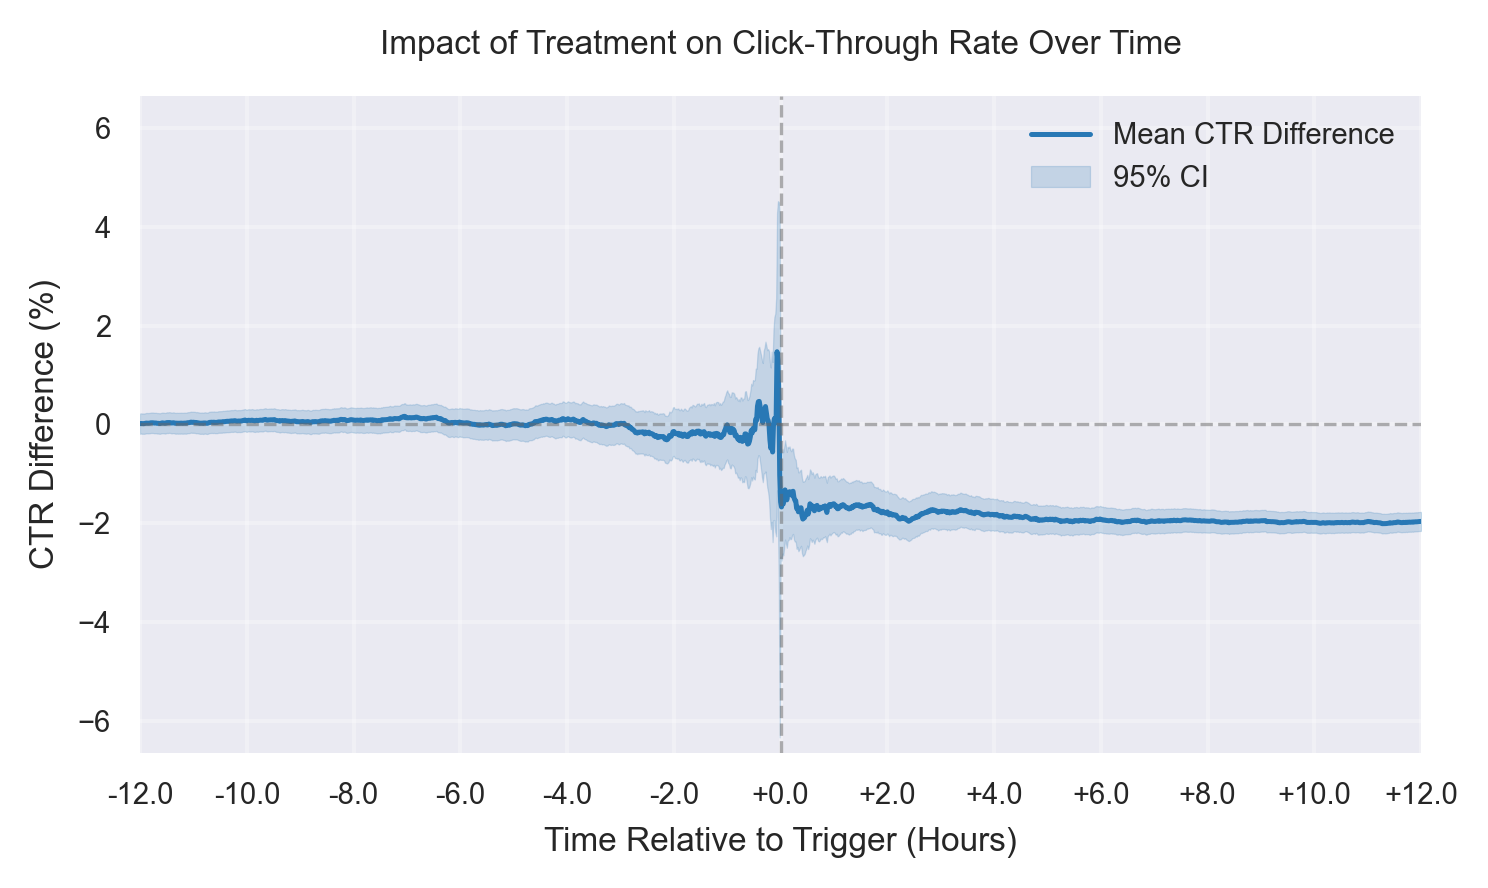

In [29]:
# Time-based analysis
pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()


Actual y-limits set in plot:
Lower y-limit: -6.539626
Upper y-limit: 6.539626


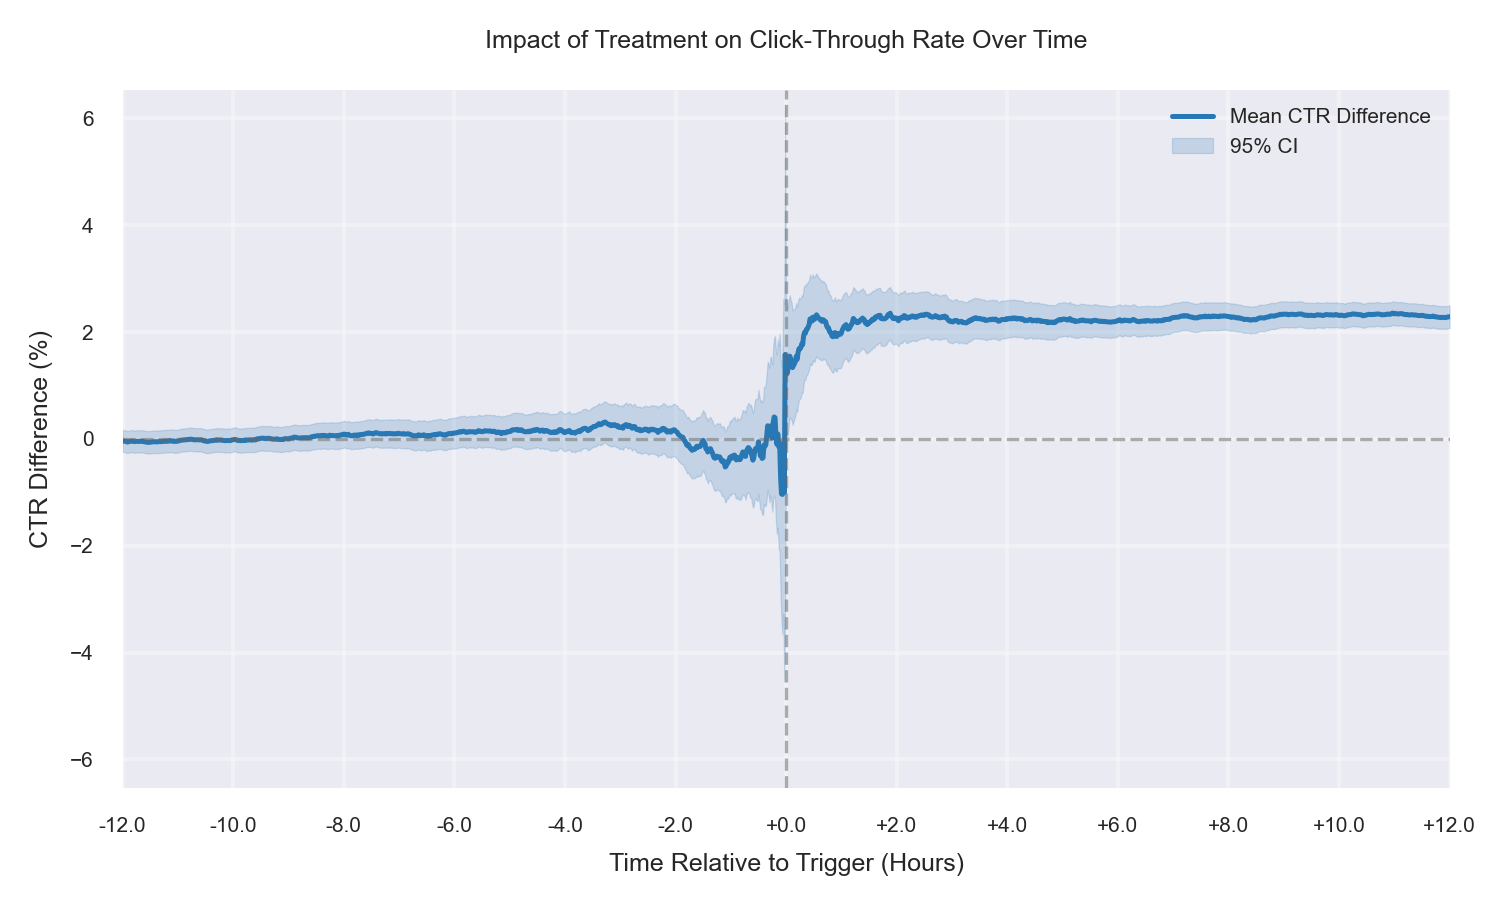

In [ ]:

pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()


Actual y-limits set in plot:
Lower y-limit: -10.269952
Upper y-limit: 10.269952


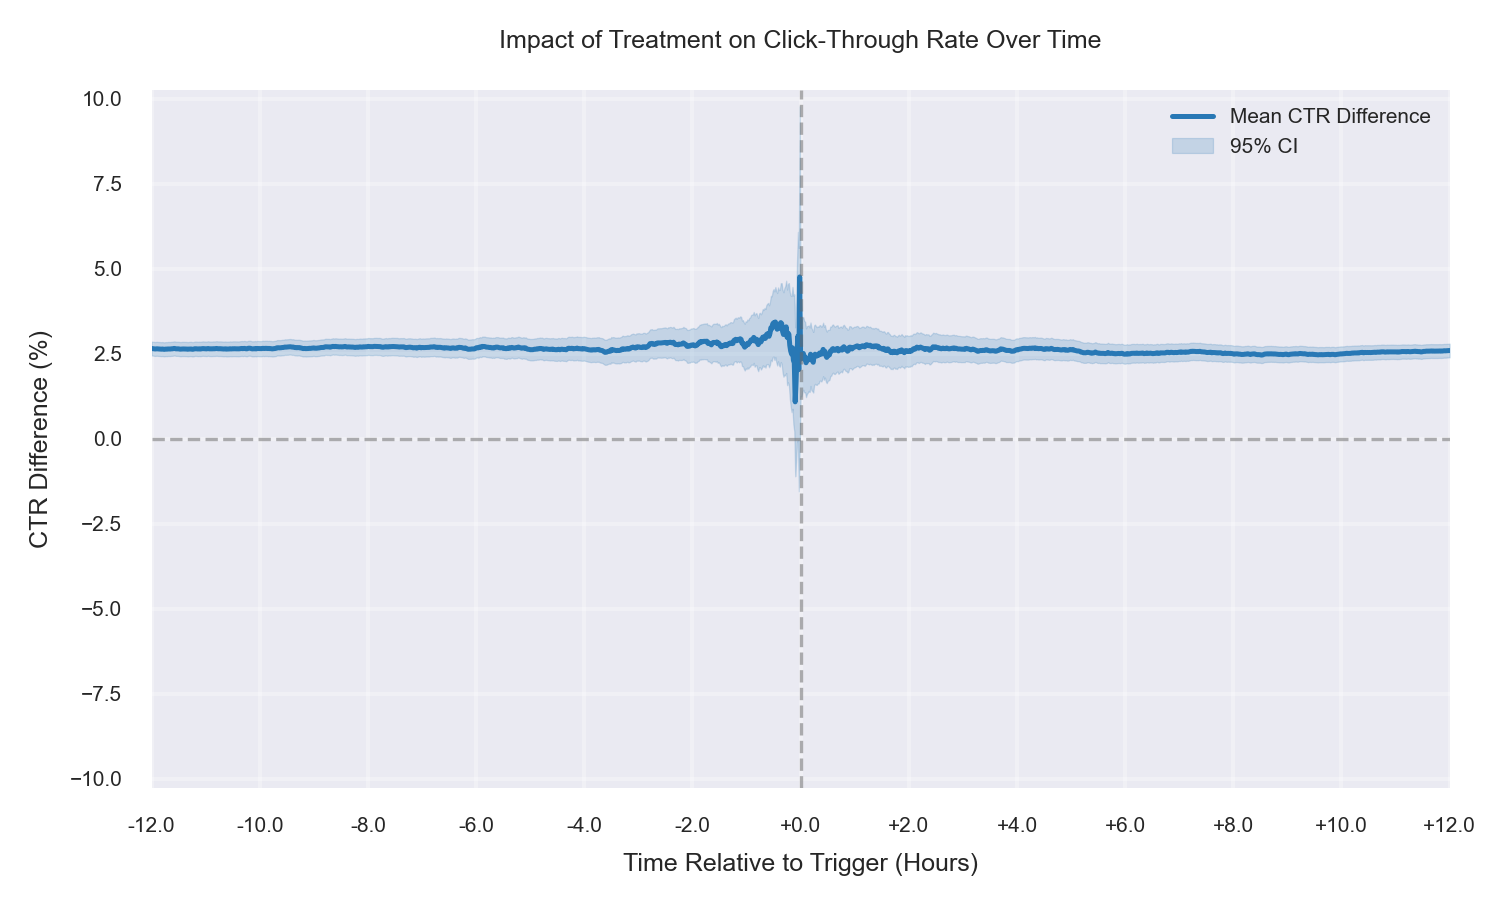

In [ ]:

pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()


Actual y-limits set in plot:
Lower y-limit: -9.966200
Upper y-limit: 9.966200


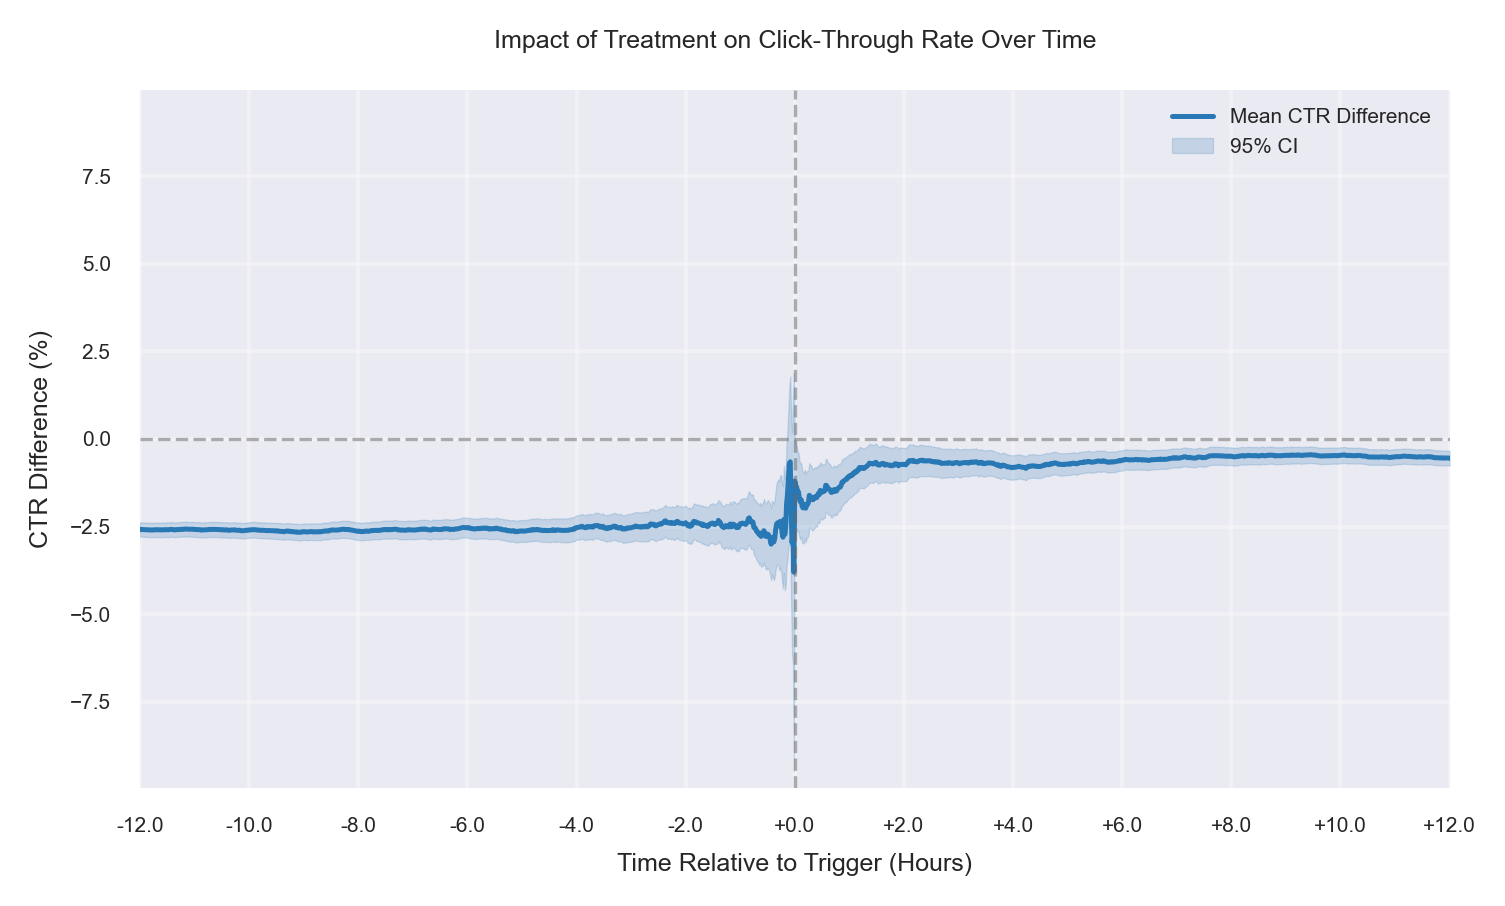

In [10]:

pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()